<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 1</h4>
<h4 align="center">If you have any question about homework :
for number 1,4 : @AHY2002 and for questions number 2,3,5 : @Mbnkh10


In [10]:
# import required packages
import numpy as np
import cv2 #Install opencv-python by issuing the following command: (pip install opencv-python)
import matplotlib.pyplot as plt
import time
import random

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. LDU decomposition
In linear algebra, LU decomposition factors a matrix ($\textbf{A} :n \times n$) as the product of a lower triangular matrix ($\textbf{L} :n \times n$) and an upper triangular matrix ($\textbf{U} :n \times n$). The product sometimes includes a permutation matrix ($\textbf{P} :n \times n$) as well.
$$ \textbf{PA} = \textbf{LU} $$
We know that the elements on the main diagonal of the $\textbf{U}$ are the pivots. So $\textbf{U}$ can be decomposed into a diagonal matrix ($\textbf{D} :n \times n$) with elements whose pivots are on the main diagonal and a normalized $\textbf{U}$ matrix.
$$ \textbf{PA} = \textbf{LDU} $$
>Complete the function below.<br>
>Note that in this problem, we assume that the elimination process does not require any row permutation.<br>

In [ ]:
# Code cell
def LDU_decomposition(A):
    
  n = A.shape[0]
  L = np.eye(n)
  U = A.copy()
    
  for i in range(n):
    multiplier = U[i+1:, i] / U[i, i]
    L[i+1:, i] = multiplier
    U[i+1:] -= multiplier[:, np.newaxis] * U[i]

  D = np.diag(np.diag(U))
  U = np.linalg.inv(D) @ U
  return L, D, U

In [ ]:
# Evaluation Cell
n = random.randint(10,50)
A = np.random.randn(n, n)
L,D,U = LDU_decomposition(A.copy())

assert np.linalg.norm(L - np.tril(L)) < 1e-10, "L is not lower triangular"
assert np.linalg.norm(D - np.diag(np.diag(D))) < 1e-10, "D is not diagonal"
assert np.linalg.norm(U - np.triu(U)) < 1e-10, "U is not upper triangular"
assert np.linalg.norm(A - L @ D @ U) < 1e-10, "L and D and U does not satisfy A = LDU"

print('status: successful')

status: successful


## 2. Gauss-Jordan's method for matrix inversion

**Definition** : 
Let $\textbf{A}$ be an $n \times n$ matrix. Its inverse, if it exists, is the $n \times n$ matrix $\textbf{A}^{-1}$ such that

$$ \textbf{AA}^{-1} = \textbf{I} $$

Where $\textbf{I}$ is the $n \times n$ identity matrix. If $\textbf{A}^{-1}$ exists, we say that $\textbf{A}$ is invertible. Not all square matrices are invertible, but you don't need to worry about this issue in this problem.You Should calculate inverse of matrix in Gauss-Jordan method.
First, form the augmented matrix for the matrix $\textbf{A}$, then triangulate the matrix using the elimination method. In the next step, set the non-zero elements above the pivots to zero, and at the end, divide each row into pivots so that the pivots are equal to one.

In [ ]:
# Code cell
def inverse(A):
    
  """
    Computes the inverse of the input matrix
    
    inputs:
      A (numpy ndarray): input matrix
        
    outputs:
      A_inv (numpy ndarray): inverse of the input matrix
  """

  # write your code here
  n = A.shape[0]
  A_inv = np.hstack([A, np.eye(n)])

  for i in range(n):
    multiplier = A_inv[i+1:, i] / A_inv[i,i]
    A_inv[i+1:] -= multiplier[:, np.newaxis] * A_inv[i]

  for i in range(n-1, -1, -1):
    for j in range(i-1, -1, -1):
      if A_inv[j][i] != 0:
        multiplier = A_inv[j][i]/A_inv[i][i]
        A_inv[j] -= multiplier * A_inv[i]
    
  for i in range(n):
    A_inv[i] /= A_inv[i][i]

  return A_inv[:,n:]

In [ ]:
# Evaluation Cell

n = random.randint(10,50)
A = np.random.rand(n, n) + n * np.eye(n, n)
s = time.time()
A_inv = inverse(A.copy())
elapsed = time.time() - s

assert np.linalg.norm(A @ A_inv - np.eye(n, n)) < 1e-10, "A_inv does not satisfy A @ A_inv = I"

print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 0.0045 seconds


## 3. Matrix eliminiation
 
Gaussian elimination is a popular method for solving systems of linear equations. It involves performing a series of row operations on the augmented matrix of the system until it is in row echelon form, and then back-substituting to solve for the unknowns.
The function gauss_elim takes two arguments: the matrix A representing the coefficients of the equations and the columns of matrix A are linearly independent, and the vector b representing the constants on the right-hand side of the equations. It returns the solution vector x.

Here's an example of using the function to solve a system of equations:
$$
A = \left(\begin{array}{cc} 
2 & 1 & -1\\ 
4 & -6 & 0\\ 
-2 & 7 & 2
\end{array}\right)
$$


$$
b = \left(\begin{array}{cc} 
8\\ -2\\7
\end{array}\right)
$$
This will output the solution :
$$
x = \left(\begin{array}{cc} 
-1.0\\ 1.0 \\2.0
\end{array}\right)
$$

In [ ]:
# Code cell
def gaussian_elimination(A, b):
  """
    matrix A represents the coefficients of the equations and the columns of matrix A are linearly independent

    vector b representing the constants 

  """
  # write your code here
  
  n = A.shape[0]
  A_prime = A.copy().astype('float64')
  b_prime = b.copy().astype('float64')

  for i in range(n):
    multiplier = A_prime[i+1:, i] / A_prime[i,i]
    A_prime[i+1:] -= multiplier[:, np.newaxis] * A_prime[i]
    b_prime[i+1:] -= multiplier[:] * b_prime[i]

  x = np.zeros(n)
  for i in range(n-1, -1, -1):
    x[i] = (b_prime[i] - np.dot(A_prime[i, i+1:], x[i+1:])) / A_prime[i,i]
    
  return x
      

In [ ]:
# Evaluation Cell
n = 10
A = np.zeros((10,10))
b = np.random.randint(100, size=(10))
while np.linalg.matrix_rank(A) != n: 
  A = np.random.randint(0,100,(n, n))
s = time.time()
elapsed = time.time() - s
assert np.linalg.norm(A @ gaussian_elimination(A,b) - b) < 1e-7, "A,b does not satisfy x"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 8e-05 seconds


## 4. Image Processing
In this section, we are going to get to know the cv2 package.

>Using this package, load and display the image provided to you.

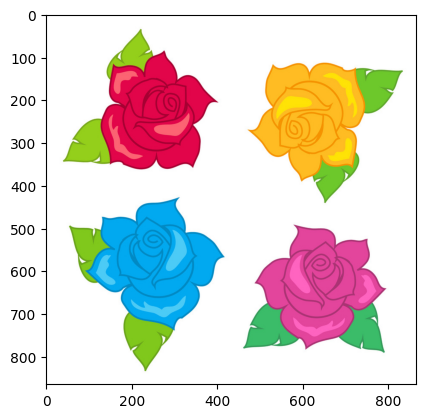

In [13]:
# Code cell
img = cv2.imread('pic.png', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

>Image files store color information in channels. Separate the image channels and save in the following variables and display them.

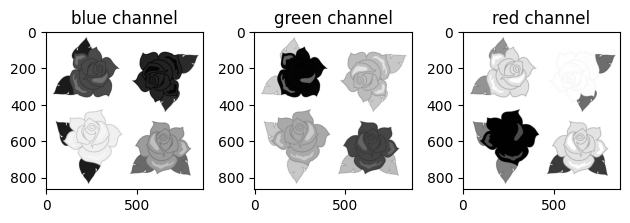

In [27]:
# Code cell
(blue_ch, green_ch, red_ch) = cv2.split(img)

fig , axes = plt.subplots(1, 3)

axes[0].imshow(cv2.cvtColor(blue_ch, cv2.COLOR_BGR2RGB))
axes[0].set_title('blue channel')

axes[1].imshow(cv2.cvtColor(green_ch, cv2.COLOR_BGR2RGB))
axes[1].set_title('green channel')

axes[2].imshow(cv2.cvtColor(red_ch, cv2.COLOR_BGR2RGB))
axes[2].set_title('red channel')

plt.tight_layout()
plt.show()

>Now convert your original image from the RGB color space to gray(By using the built-in functions of the cv2 package). Display the resulting image.

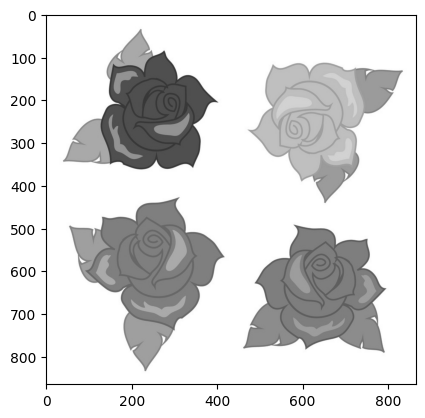

In [28]:
# Code cell
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB));

>Transpose the gray image matrix. what will happen?

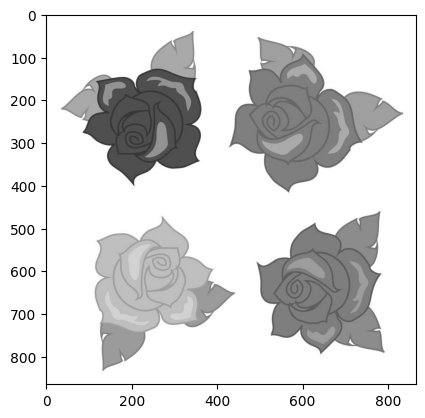

In [31]:
# Code cell
transposed_img = np.transpose(img_gray)
plt.imshow(cv2.cvtColor(transposed_img, cv2.COLOR_BGR2RGB));

The image is approximated to the original diameter.

>In this section, crop the image and display only one of the flowers.

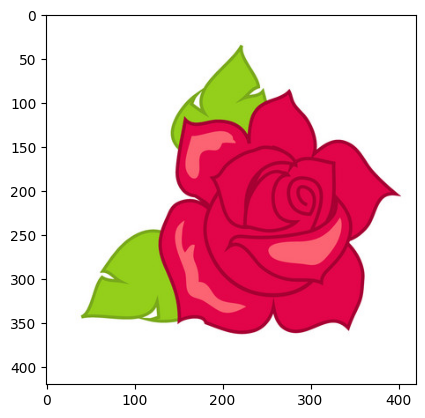

In [41]:
# Code cell
red_flower = img[0:420, 0:420]
plt.imshow(cv2.cvtColor(red_flower, cv2.COLOR_BGR2RGB));

>Change the place of the red and blue flowers and display the new image.

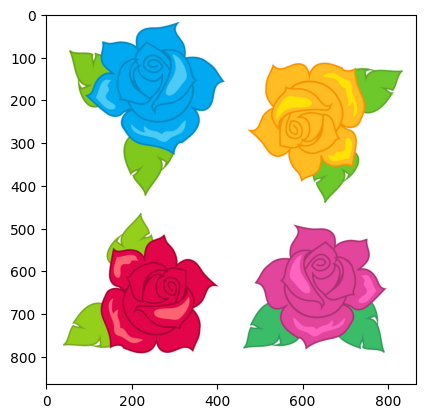

In [48]:
# Code cell
blue_flower = img[420:840,0:420]
changed_img = img.copy()
changed_img[10:430, 0:420] = blue_flower
changed_img[430:850,0:420] = red_flower

plt.imshow(cv2.cvtColor(changed_img, cv2.COLOR_BGR2RGB));

>Make the gray image lighter and darker and observe.

In [ ]:
# Code cell
...

>There are different ways to create a grayscale image. One of the ways is to replace the RGB values of each pixel with their average. Provide the following matrix elements in such a way that by applying this matrix to each pixel, the mean of R,G,B replaces the values of R,G,B. Then display the grayscaled image of this method.<br>
$$Gray \, Matrix \, = 
\begin{bmatrix}
    g_{11} & g_{12} & g_{13}\\
    g_{21} & g_{22} & g_{23}\\
    g_{31} & g_{32} & g_{33}
\end{bmatrix}
$$

In [ ]:
# Code cell
...

>Consider the color adjusting filter generated by the matrix : <br>
$$Filter \, Matrix \, = 
\begin{bmatrix}
    0.7 & 0.15 & 0.15\\
    0.15 & 0.7 & 0.15\\
    0.15 & 0.15 & 0.7
\end{bmatrix}
$$
>Apply this filter to each pixel of image and save the result as <font color='orange'> Filt_Img </font>.

In [ ]:
# Code cell
...

>Consider the matrix in the previous step. Is the transformation defined by this matrix invertible?<br>
Which means, can you get the original image colors back once you applied the filter?<br>
If your answer is yes, rebuild the image and display it.

In [ ]:
# Code cell
...

# 5. QR factorization(bonus)

$\textbf {Definition}$ All $\textbf{A}_{m\times n}$ matrix have QR factorization where Q is an orthonormal matrix and R is an upper triangular matrix.$$A=QR$$

Using the HH matrix, complete the code cells below to create an algorithm for finding QR factorization of matrix A.

In [1]:
#Code cell
def my_QR(A):
  """
  inputs:
    A (numpy ndarray): input matrix
  outputs:
    Q (numpy ndarray): orthonormal matrix
    R (numpy ndarray): upper triangular matrix
  
  """
  ### To Do ###
  m, n = A.shape
  Q = np.eye(m)
  R = A.copy()

  for j in range(n):
    x = R[j:, j]
    norm_x = np.linalg.norm(x)
    if norm_x == 0:
      continue
    v = x.copy()
    v[0] += np.sign(x[0]) * norm_x
    v /= np.linalg.norm(v)
    Qj = np.eye(m)
    Qj[j:, j:] -= 2 * np.outer(v, v)
    R = Qj @ R
    Q = Q @ Qj.T
  return Q,R

In [7]:
# Evaluation Cell
# time and correctness test
numpy_test = {'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}
yours_test = {'upper-triangular and  orthogonal test error':0.0, 'correctness test error':0.0}

num_test = 50
for i in range(num_test):
    m, n = np.random.randint(40, 50), np.random.randint(40, 50)
    A = np.random.randn(m,n)

    # numpy code
    Q, R = np.linalg.qr(A.copy(), mode='complete')
    numpy_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(R,-1)) + np.linalg.norm(np.eye(m) - Q @ Q.T)
    numpy_test['correctness test error'] += np.linalg.norm(A - Q @ R)

     ### To Do ###
    
    my_Q, my_R = my_QR(A.copy())
    yours_test['upper-triangular and  orthogonal test error'] += np.linalg.norm(np.tril(my_R,-1)) + np.linalg.norm(np.eye(m) - my_Q @ my_Q.T)
    yours_test['correctness test error'] += np.linalg.norm(A - my_Q @ my_R)

for name in numpy_test:
    numpy_test[name] /= num_test
    yours_test[name] /= num_test

yours_check = {'upper-triangular and  orthogonal test error': yours_test['upper-triangular and  orthogonal test error'] <= 1e-5, 
               'correctness test error': yours_test['correctness test error'] <= 1e-5}

print(f'numpy| test ---> {numpy_test}')
print(f'yours| test ---> {yours_test}')
print(f'yours| check ---> {yours_check}')

numpy| test ---> {'upper-triangular and  orthogonal test error': 4.137867276516591e-15, 'correctness test error': 2.2174930752298737e-14}
yours| test ---> {'upper-triangular and  orthogonal test error': 1.7091642974494215e-14, 'correctness test error': 5.570519907186832e-14}
yours| check ---> {'upper-triangular and  orthogonal test error': True, 'correctness test error': True}
